<H1><center> THE SPARK FOUNDATION 



## Data Science and Business Analytics Internship
#### Batch- GRIP APRIL'23
### TASK 1: Prediction Using Supervised Machine Learning
### Author : Nikhil Neve

#### Problem Statement
>* Predict percentage of scores of students based on number of study hours.
>* Predict the score for 9.25 hrs/day of study.


#### Required Pacakges
> Packages need installed in Jupiter Notebook or it can be install 
>>* !pip3 install pandas                        ----------    # Library for data manipulation and analysis
>>* !pip3 install numpy                         ----------    # Library for numerical operation and array manipulation
>>* !pip3 install matplotlib                    ----------    # Library for visualization
>>* !pip3 install seaborn                       ----------    # Library for advanced visualization
>>* !pip3 install scikit-learn                  ----------    # Library for machine learning algorithms and model evaluation

#### Importing required libraries

In [1]:
import pandas as pd
import numpy as np                                         
import matplotlib.pyplot as plt 
import seaborn as sns   
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 


In [2]:
#Reading data from local system
data=pd.read_csv("E:\Internship\The Spark Foundation\Task 1\student_scores.csv")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#### Another method to load data: from remote link
>* url = "http://bit.ly/w-data"
>* data = pd.read_csv(url)

In [3]:
#rows and columns in DataFrame data
data.shape

(25, 2)

In [4]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
#Check wheather data has null value
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
# Data type of data 
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [7]:
#Summary of Descriptive Statistics 
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [31]:
#Data is already cleaned and no need to pre-process the data.

#### Visualization of relationship  of variable and pattern and trends in data.

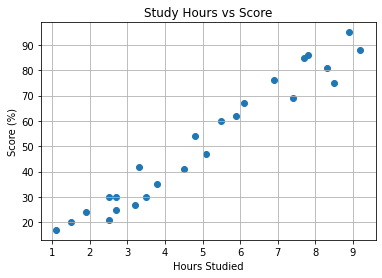

In [8]:
plt.scatter(data['Hours'], data['Scores'])
plt.title('Study Hours vs Score')
plt.xlabel('Hours Studied')
plt.ylabel('Score (%)')
plt.grid(True)
plt.show()

##### Insights- 
>* Positive linear relationship between both variable.
>* Some variability is also there. It indicates there are another factors too which influence students score besided study hour.

#### Correlation Matrix 


In [9]:
#Finding relation between both variables (Hours and Score)
data.corr()


,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


> Correlartion coefifcient ranges from -1 to 1
>>* +1 indicates perfect positive correlation
>>* -1 indicates perfect negative correlation
>>* 0 indicates no correlation 

Heatmap plot of correlation matrix


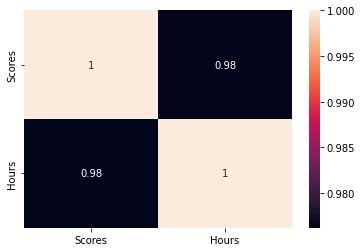

In [10]:
#Heatmap plot of correlation matrix between both variables.
sns.heatmap(data[['Scores','Hours']].corr(), annot = True)
print('Heatmap plot of correlation matrix')

###### Insights-  
>Correlation coefficient of 0.976191. 
>Strong positive correlation between the 'Hours' and 'Scores' variables. Which means number of hours studied increases, the score also increases, and vice versa.

#Box plot to visualize the data 
>* sns.boxplot(x=data['Hours'])
>* plt.show()

>* sns.boxplot(x=data['Scores'])
>* plt.show()

>Insights- 'Scores' data is slightly skewed to the left.

#Density Plot 
>* sns.displot(data, x='Hours', kde=True)
>* plt.show()

>* sns.displot(data, x='Scores', kde=True)
>* plt.show()

#### Split the dataset into training and testing sets


>* Here we are dividing or spliting the dataset in the ratio of 80:20, where 80% is the training dataset and 20% is testing to train the model on training set and then evaluate its performance on testing set.
>* We are going to use the training set to train the linear regression model, and then use the testing set to evaluate the performance of the model.

In [11]:
X = data.iloc[:, [0]].values    #Feature Variable  ||another way slicing could done ([:,:-1])
y = data.iloc[:, 1].values      #Target Variable   ||another way slicing could done [:, [-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [12]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [13]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

### Linear Regression Model Preparation 
Linear Regression is a statistical method that is used to establish the linear relationship between two variable by finding the line of best fit.
(Dependent- Scores and Independent- Hours)

In [14]:
regressor = LinearRegression()      #Creating LinearRegression object
regressor.fit(X_train, y_train)     #Train the Linear Regression model using the training set (X_train, y_train).
print('Model is prepared now.')

Model is prepared now.


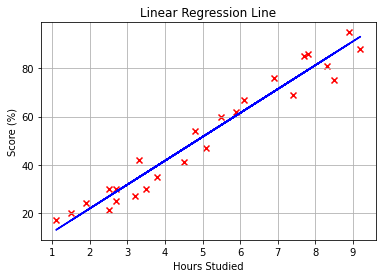

intercept=2.018160041434683, slope coefficient=[9.91065648]


In [36]:
#Plotting the regression line 
# Equaltion of Linear Regression y=mx+c  i.e., Scores=(slope_coefficient).(Hours)+ intercept
line=regressor.coef_*X+regressor.intercept_

#Plotting the scatter plot with the regression line
plt.scatter(X,y,color='red',marker='x')
plt.plot(X,line,color='blue');
plt.title('Linear Regression Line')
plt.xlabel('Hours Studied')
plt.ylabel('Score (%)')
plt.grid(True)
plt.show()
print('intercept={}, slope coefficient={}'.format(regressor.intercept_,regressor.coef_))

In [16]:
#Actual Value of target variable (score) 
y_test

array([20, 27, 69, 30, 62], dtype=int64)

In [17]:
X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [18]:
#make prediction of the target variable (Scores) using the trained model on the test set (X_test).
y_pred = regressor.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [19]:
#We can compare both y_test and y_predict
df = pd.DataFrame({'Actual Score' : y_test, 'Predicted Score': y_pred})
df

,Actual Score,Predicted Score
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


#### This predicted Score is our Prediction to the percentage of an student based on the number of study hours.

#### Model Evaluation
>###### Accuracy of Model


In [35]:
#How well my ML model performing
mae = metrics.mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

results = pd.DataFrame({'Metric': ['Mean Absolute Error', 'R2 Score', 'Mean Squared Error', 'Root Mean Squared Error'],
                        'Value': [mae, r2, mse, rmse]})

print(results)

                    Metric      Value
0      Mean Absolute Error   4.183860
1                 R2 Score   0.945491
2       Mean Squared Error  21.598769
3  Root Mean Squared Error   4.647448


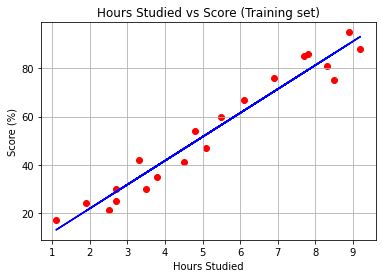

In [22]:
#Visualize the training set results
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Hours Studied vs Score (Training set)')
plt.xlabel('Hours Studied')
plt.ylabel('Score (%)')
plt.grid(True)
plt.show()


## Problem:
> #### What will be predicted score if a student studies for 9.25 hrs/ day?


In [24]:
Hours = np.array([[9.25]])
score_pred = regressor.predict(Hours)
print('Predicted score for 9.25 hrs/day:', score_pred)

Predicted score for 9.25 hrs/day: [93.69173249]


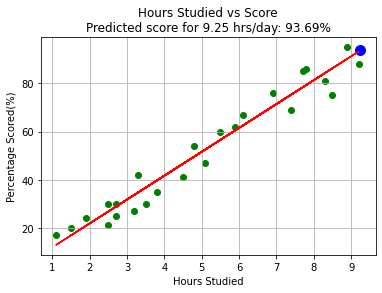

In [51]:
# Scatter plot of the regression line and predicted score

plt.scatter(X, y, color='green', marker='o')
plt.plot(X, line, color='red');
plt.scatter(Hours, score_pred, color='blue', s=100)
plt.title('Hours Studied vs Score\nPredicted score for 9.25 hrs/day: {:.2f}%'.format(score_pred[0]))
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored(%)')
plt.grid(True)
plt.show()


#### Predicted score when student study for 9.25 hrs/day: 93.69%